# Visualization of Titanic Data
This notebook tries some standard visualization techniques on the Kaggle learner competition, [Titanic](https://www.kaggle.com/c/titanic). We mainly use principal components analysis (PCA) and the visualization techniques provided by the [scikit-learn manifold module](http://scikit-learn.org/0.16/modules/classes.html#module-sklearn.manifold).

Ideally, the green and red dots in at least some of the visualizations would appear nicely separated, but none of the visualizations are like that. This is an indication that some feature engineering is required.

In [1]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
from   mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from   sklearn.decomposition import PCA
from   sklearn import manifold
from   sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=4)
np.set_printoptions(linewidth=132)
plt_style = 'ggplot'  # seaborn-talk is better, if available

## Get the data
The data we use is the original data provided by Kaggle, but with some cleaning applied as suggested by the [Dataquest tutorial](https://www.dataquest.io/course/kaggle-competitions).

In [2]:
cleaned = pd.read_csv("training_cleaned.csv")
cleaned.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22,1,0,7.2500,0,0
1,1,1,38,1,0,71.2833,1,1
2,3,1,26,0,0,7.9250,0,1
3,1,1,35,1,0,53.1000,0,1
4,3,0,35,0,0,8.0500,0,0


## Create dummy variables
Our data is a mix of numeric and categorical columns. It doesn't make sense to use methods like PCA on categorical data, because there is no metric on the space of categories. 

To get around this, we create [dummy variables](https://en.wikipedia.org/wiki/Dummy_variable_(statistics%29) (sometimes called _1-hot vectors_). We take care to avoid the [dummy variable trap](http://www.algosome.com/articles/dummy-variable-trap-regression.html) by dropping the last of the dummy variable columns.

In [3]:
# Converts a given categorical variable to dummy variables
def make_dummies(df, cat):
    dummies = pd.get_dummies(df[cat]).rename(columns=lambda x: cat + '_' + str(x))
    df = pd.concat([dummies, df], axis=1)
    last_cat = np.sort(dummies.columns.values)[-1]
    df.drop([cat, last_cat], inplace=True, axis=1)
    return df

In [4]:
cleaned = make_dummies(cleaned, 'Pclass')
cleaned = make_dummies(cleaned, 'Embarked')
cleaned.head()

,Embarked_0,Embarked_1,Pclass_1,Pclass_2,Sex,Age,SibSp,Parch,Fare,Survived
0,1,0,0,0,0,22,1,0,7.2500,0
1,0,1,1,0,1,38,1,0,71.2833,1
2,1,0,0,0,1,26,0,0,7.9250,1
3,1,0,1,0,1,35,1,0,53.1000,1
4,1,0,0,0,0,35,0,0,8.0500,0


## Split into data and labels

In [5]:
X = cleaned.ix[:,0:-1].values  # data
y = cleaned.ix[:,-1].values  # labels

In [6]:
column_labels = cleaned.columns.values
y_labels = ['Survived', 'Did not survive']

## Normalize the data

In [7]:
X_std = StandardScaler().fit_transform(X)
print X_std[:5,:]

[[ 0.6158 -0.482  -0.5657 -0.5102 -0.7377 -0.5657  0.4328 -0.4737 -0.5024]
 [-1.6238  2.0745  1.7678 -0.5102  1.3556  0.6639  0.4328 -0.4737  0.7868]
 [ 0.6158 -0.482  -0.5657 -0.5102  1.3556 -0.2583 -0.4745 -0.4737 -0.4889]
 [ 0.6158 -0.482   1.7678 -0.5102  1.3556  0.4333  0.4328 -0.4737  0.4207]
 [ 0.6158 -0.482  -0.5657 -0.5102 -0.7377  0.4333 -0.4745 -0.4737 -0.4863]]


## Explaining variance via PCA

In [8]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[  4.6482e-01  -1.1957e-01  -5.1384e-01   6.6561e-01  -3.2799e-02  -1.6900e-01  -8.2348e-02   1.5387e-01  -4.9822e-02]
 [ -5.0981e-01   9.8849e-02   4.1653e-01   6.7723e-01   7.6046e-02  -2.0016e-01   2.2504e-01  -1.7021e-02  -3.7315e-02]
 [ -4.7084e-01   5.5233e-02  -4.6372e-01  -2.4347e-01  -4.2779e-02  -6.7609e-01  -6.7577e-02   1.9136e-01   2.8756e-02]
 [  2.4950e-01  -1.1531e-02   6.1624e-02  -1.3706e-01   7.5361e-01  -1.8277e-01   4.8315e-01   2.7566e-01   6.5417e-02]
 [ -1.5902e-01  -3.4339e-01   4.6781e-02   8.4444e-02   5.4439e-01   2.0312e-02  -6.9099e-01  -1.5521e-01   2.2170e-01]
 [ -1.4258e-01   3.5506e-01  -4.5895e-01   6.6114e-02   2.4565e-01   1.9089e-01   2.2601e-01  -6.9019e-01   1.1990e-01]
 [ -1.7296e-03  -5.6932e-01   2.5261e-03   5.2672e-04  -2.4507e-01  -8.6842e-02   3.4457e-01  -1.7486e-01   6.7747e-01]
 [ -5.1653e-02  -5.9443e-01  -3.8216e-02  -7.3203e-02   4.0744e-02  -1.0935e-01   1.8430e-01  -3.5078e-01  -6.8303e-01]
 [ -4.3796e-01  -2.2647e-0

### Eigenvalues in Descending Order

In [9]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print '%.3f' % i[0]

Eigenvalues in descending order:
2.316
1.742
1.363
1.056
0.788
0.678
0.559
0.323
0.187


<IPython.core.display.Javascript object>


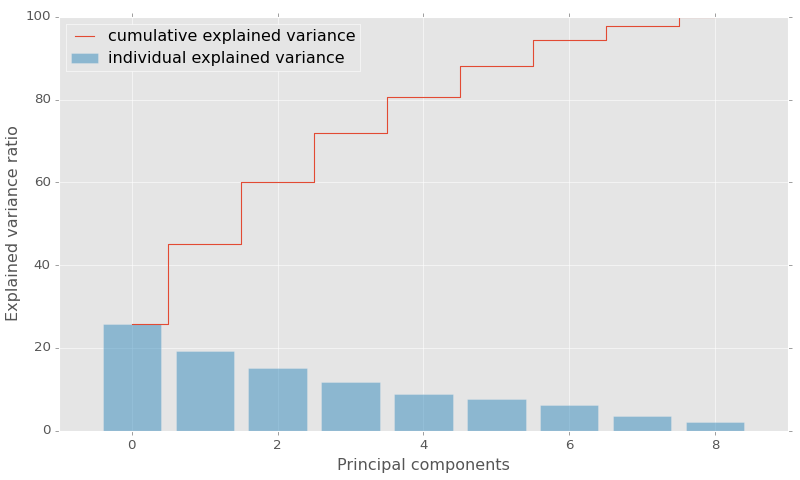

In [10]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
num_eigs = len(eig_pairs)
with plt.style.context(plt_style):
    plt.figure(figsize=(10, 6))

    plt.bar(range(num_eigs), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(num_eigs), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

## Isomap

<IPython.core.display.Javascript object>


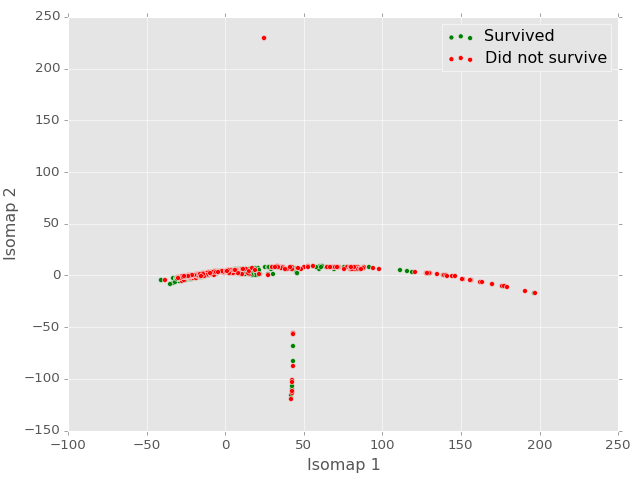

In [11]:
X_iso = manifold.Isomap(n_components=2).fit_transform(X)
with plt.style.context(plt_style):
    plt.figure(figsize=(8, 6))
    for lab, col in zip((0, 1), ('green', 'red')):
        plt.scatter(X_iso[y==lab, 0],
                    X_iso[y==lab, 1],
                    label=y_labels[lab],
                    c=col)
    plt.xlabel('Isomap 1')
    plt.ylabel('Isomap 2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

## Locally Linear Embedding (LLE)

<IPython.core.display.Javascript object>


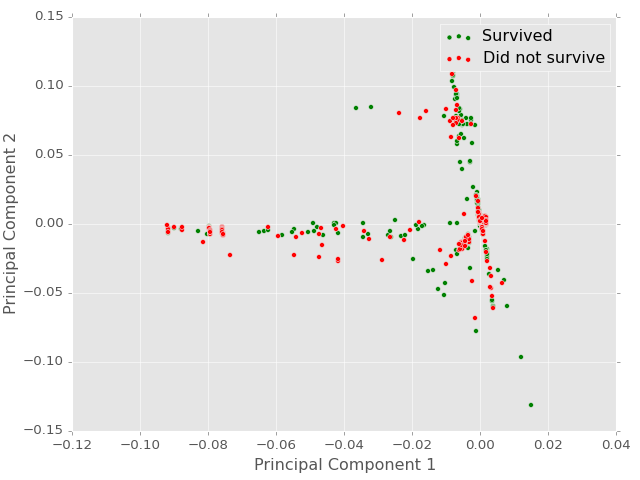

In [12]:
X_lle = manifold.LocallyLinearEmbedding(n_components=2).fit_transform(X)
with plt.style.context(plt_style):
    plt.figure(figsize=(8, 6))
    for lab, col in zip((0, 1), ('green', 'red')):
        plt.scatter(X_lle[y==lab, 0],
                    X_lle[y==lab, 1],
                    label=y_labels[lab],
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

## Spectral Embedding¶

<IPython.core.display.Javascript object>


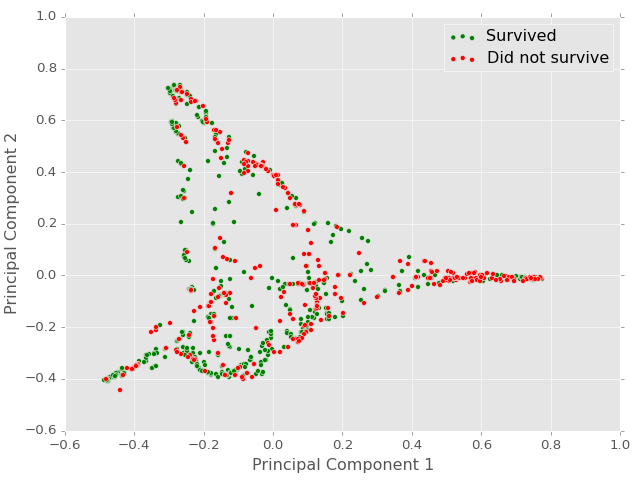

In [13]:
X_se = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
with plt.style.context(plt_style):
    plt.figure(figsize=(8, 6))
    for lab, col in zip((0, 1), ('green', 'red')):
        plt.scatter(X_se[y==lab, 0],
                    X_se[y==lab, 1],
                    label=y_labels[lab],
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

## Multi-dimensional Scaling (MDS)

<IPython.core.display.Javascript object>


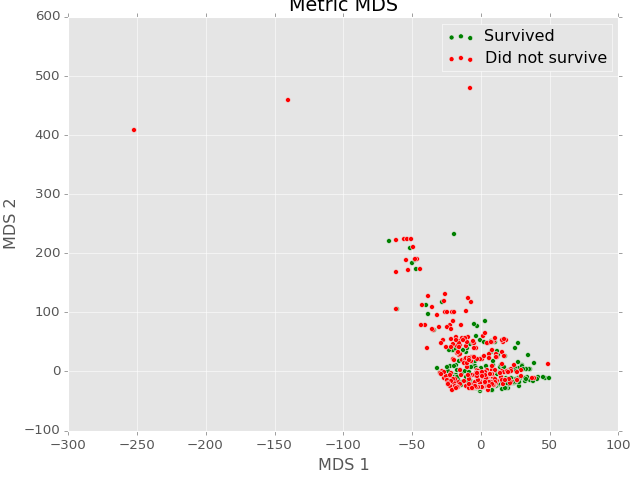

In [14]:
X_mds = manifold.MDS(n_components=2).fit_transform(X)
with plt.style.context(plt_style):
    plt.figure(figsize=(8, 6))
    for lab, col in zip((0, 1), ('green', 'red')):
        plt.scatter(X_mds[y==lab, 0],
                    X_mds[y==lab, 1],
                    label=y_labels[lab],
                    c=col)
    plt.xlabel('MDS 1')
    plt.ylabel('MDS 2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.title('Metric MDS')
    plt.show()

## PCA (2D)

<IPython.core.display.Javascript object>


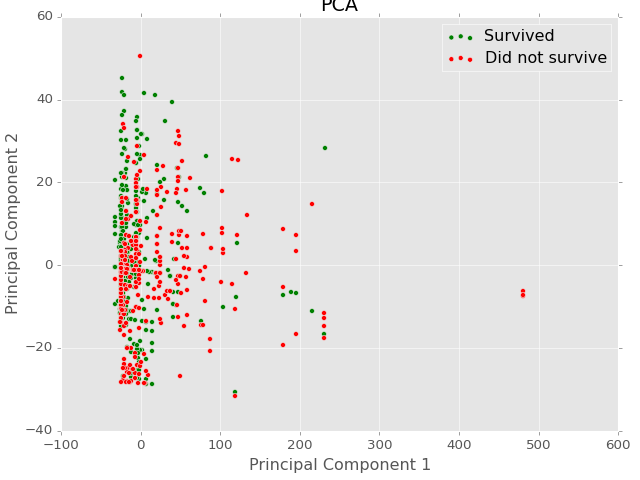

In [15]:
X_pca = PCA(n_components=2).fit_transform(X)
with plt.style.context(plt_style):
    plt.figure(figsize=(8, 6))
    for lab, col in zip((0, 1), ('green', 'red')):
        plt.scatter(X_pca[y==lab, 0],
                    X_pca[y==lab, 1],
                    label=y_labels[lab],
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.title('PCA')
    plt.show()

## PCA (3D)

<IPython.core.display.Javascript object>


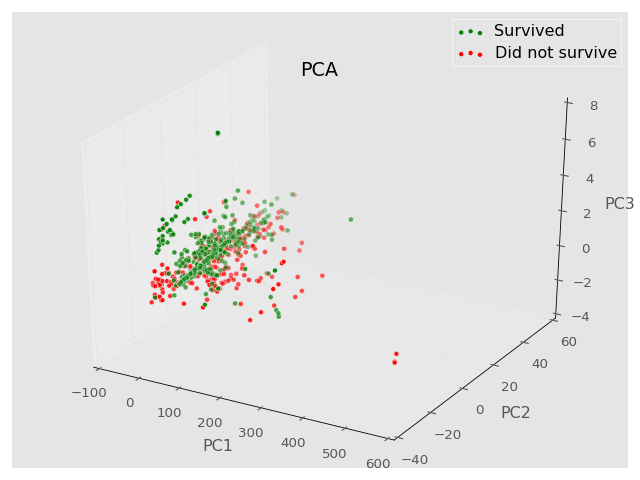

In [16]:
X_pca3 = PCA(n_components=3).fit_transform(X)
with plt.style.context(plt_style):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for lab, col in [(0, 'green'), (1, 'red')]:
        xs = X_pca3[y==lab, 0]
        ys = X_pca3[y==lab, 1]
        zs = X_pca3[y==lab, 2]
        ax.scatter(xs, ys, zs, c=col, label=y_labels[lab])

        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')

        plt.legend(loc='best')
        plt.tight_layout()
        plt.title('PCA')
        plt.show()

## t-SNE (2D)

<IPython.core.display.Javascript object>


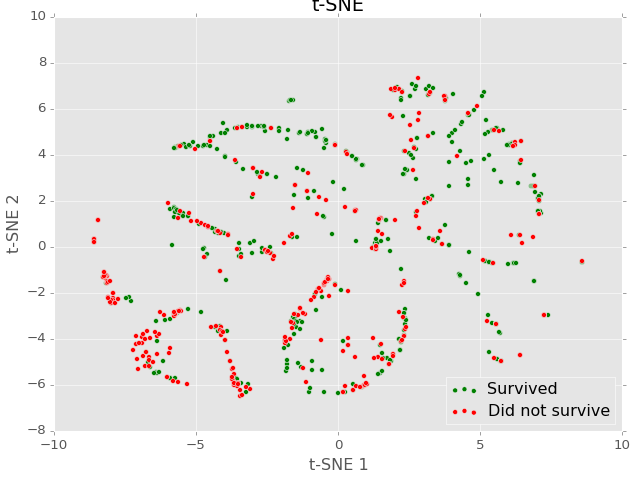

In [17]:
X_tsne = manifold.TSNE(n_components=2, learning_rate=100, random_state=0).fit_transform(X)
with plt.style.context(plt_style):
    plt.figure(figsize=(8, 6))
    for lab, col in zip((0, 1), ('green', 'red')):
        plt.scatter(X_tsne[y==lab, 0],
                    X_tsne[y==lab, 1],
                    label=y_labels[lab],
                    c=col)
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.title('t-SNE')
    plt.show()

## t-SNE (3D)

<IPython.core.display.Javascript object>


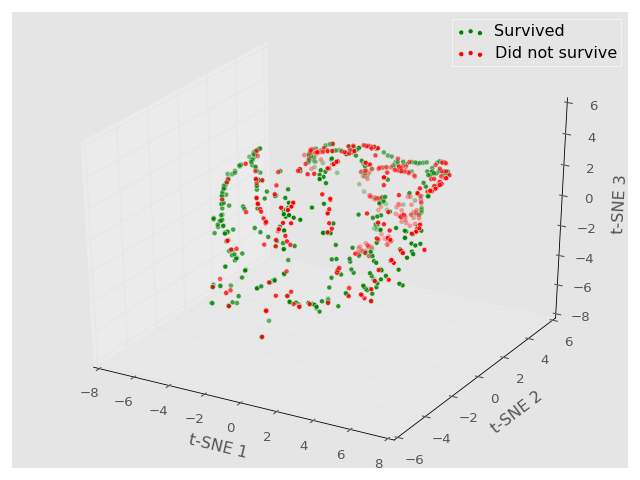

In [18]:
X_tsne3 = manifold.TSNE(n_components=3, learning_rate=100, random_state=0).fit_transform(X)
with plt.style.context(plt_style):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for lab, col in [(0, 'green'), (1, 'red')]:
        xs = X_tsne3[y==lab, 0]
        ys = X_tsne3[y==lab, 1]
        zs = X_tsne3[y==lab, 2]
        ax.scatter(xs, ys, zs, c=col, label=y_labels[lab])

        ax.set_xlabel('t-SNE 1')
        ax.set_ylabel('t-SNE 2')
        ax.set_zlabel('t-SNE 3')

        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()